# ADS open ended extended

So I realized that survey questions where buckets or segments are provided are easier to analyse. But what about open ended questions where people could write sentences or paragraphs? So with those questions we need to create those buckets and I used python for that. The current approach is:

1. Load libraries and data file
2. Change column names as needed (whatever makes it easier to process) and drop the ones that are not informative.
3. clean up some missing values by replacing them with a str character (for eg., 'NA').
4. Change entire dataframe to either lowercase or uppercase.
5. start processing one column at a time - change column to desired data type - for open ended this could be just str.
6. Create buckets/segments using replace function and removal of stop words.
7. Find common words in the column.
8. Run another replace/stop word removal if necessary
9. Count the frequencies using value_counts().
10. Move everything to a new excel file and build visualizations. 

**Please note that this is a work in progress and not the final method**.

In [1]:
#Cleaning and pre-proccessing of data

In [2]:
##Import cvs file and pandas

import pandas as pd
import numpy as np
xls = pd.ExcelFile('CRATE SURVEY RESPONSES FINAL - Copy.xlsx')
df = pd.read_excel(xls)
df = df.copy()

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df.head()

,Complete response received,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"What is your occupation (Identified in data, confirm)",Other?,First,Second,...,How often do you design or build at locations where you n...,"Temporary stormwater management (during construction, ex. erosion & sediment control)",Ability to be placed under structures,Water harvesting/reuse systems,Precast vaults,Green infrastructure solutions,Biofiltration system,Are there any other potential innovations that were not m...,Unnamed: 62,Unnamed: 63
0,completed,2021-05-11,18:27:12,2021-05-11,19:14:35,47.38,Contractor,NaN,ADS,MDS,...,Rarely,8,8,8,6,6,8,No,NaN,NaN
1,completed,2021-05-10,15:11:17,2021-05-10,16:04:38,53.35,Contractor,NaN,ADS,NaN,...,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,completed,2021-05-10,16:08:32,2021-05-10,16:39:24,30.87,Contractor,NaN,ADS,CONCRETE PIPE,...,Often,8,5,3,3,5,3,No,NaN,NaN
3,completed,2021-05-11,16:07:39,2021-05-11,16:31:49,24.17,Contractor,NaN,ADS,Cultech,...,Rarely,1=Not at all Useful,2,7,7,2,2,None,NaN,NaN
4,completed,2021-05-11,15:49:48,2021-05-11,16:30:28,40.67,Contractor,NaN,ADS,COMTECH,...,Rarely,10=Extremely Useful,4,2,10=Extremely Useful,10=Extremely Useful,6,NO,NaN,NaN


In [4]:
df.shape

(90, 64)

In [5]:
df.columns

Index(['Complete response received', 'Date of interview',
       'Time interview started', 'Completion date of interview',
       'Time interview ended', 'Duration of interview',
       'What is your occupation (Identified in data, confirm)', 'Other?',
       'First', 'Second',
       'What is the most important factor when specifying an unde...',
       'What other factors are important that were not mentioned?',
       'What is the primary benefit of the system you use today?',
       'What other factors are important that were not mentioned?.1',
       'What is the biggest challenge of the system you use today?',
       'What other factors are important that were not mentioned?.2',
       'Underground chamber system', 'Underground stormwater crates',
       'Concrete vaults', 'Metal pipes', 'Above ground pond',
       '3rd party validation', 'Regulatory approval', 'ASTM certification',
       'Case studies', 'Cost', 'Long-term durability', 'Ease of installation',
       'Engineering

In [6]:
#lets drop the first columns about the survey duration etc.
df_new = df.drop(columns =['Unnamed: 63','Other?','Complete response received', 'Date of interview', 'Time interview started', 'Completion date of interview', 'Time interview ended', 'Duration of interview'])

In [7]:
df_new.columns

Index(['What is your occupation (Identified in data, confirm)', 'First',
       'Second',
       'What is the most important factor when specifying an unde...',
       'What other factors are important that were not mentioned?',
       'What is the primary benefit of the system you use today?',
       'What other factors are important that were not mentioned?.1',
       'What is the biggest challenge of the system you use today?',
       'What other factors are important that were not mentioned?.2',
       'Underground chamber system', 'Underground stormwater crates',
       'Concrete vaults', 'Metal pipes', 'Above ground pond',
       '3rd party validation', 'Regulatory approval', 'ASTM certification',
       'Case studies', 'Cost', 'Long-term durability', 'Ease of installation',
       'Engineering stamp', 'Manufacturer warranty',
       'Ease of annual maintenance', 'Brand recognition',
       'Are you familiar with stormwater crates for underground s...',
       'What is your overa

In [8]:
df_new.shape

(90, 56)

In [9]:
#Rename all the columns
df_new.columns = ['1','3-First','3-Second','4','5','6','7','8','9','10-Underground chamber system',
                  '10-Underground stormwater crates', '10-Concrete vaults', '10-Metal pipes','10-Above ground pond',
                  '11-3rd party validation','11-Regulatory approval','11-ASTM certification','11-Case studies','11-Cost',
                  '12-Long-term durability','12-Ease of installation','12-Engineering stamp','12-Manufacturer warranty',
                  '12-Ease of annual maintenance','12-Brand recognition','13','14','15','16','17','18','19',
                  '20-Ease of assembly','20-Ease of installation','20-Installation sensitivity','20-Long-term durability',
                  '20-Structural adequacy','20-Ease of annual maintenance','21','22','23','24','25', '26','27','28','29','30',
                  '31-Temporary stormwater management','31-Ability to be placed under structures','31-Water harvesting',
                  '31-Precast vaults','31-Green infrastructure solutions', '31-Biofiltration system','32','33'
                 ]

In [10]:
#Check if columns got replaced or not
df_new.columns

Index(['1', '3-First', '3-Second', '4', '5', '6', '7', '8', '9',
       '10-Underground chamber system', '10-Underground stormwater crates',
       '10-Concrete vaults', '10-Metal pipes', '10-Above ground pond',
       '11-3rd party validation', '11-Regulatory approval',
       '11-ASTM certification', '11-Case studies', '11-Cost',
       '12-Long-term durability', '12-Ease of installation',
       '12-Engineering stamp', '12-Manufacturer warranty',
       '12-Ease of annual maintenance', '12-Brand recognition', '13', '14',
       '15', '16', '17', '18', '19', '20-Ease of assembly',
       '20-Ease of installation', '20-Installation sensitivity',
       '20-Long-term durability', '20-Structural adequacy',
       '20-Ease of annual maintenance', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31-Temporary stormwater management',
       '31-Ability to be placed under structures', '31-Water harvesting',
       '31-Precast vaults', '31-Green infrastructure solutions',
 

In [11]:
#checking for missing values
df_new.isnull().sum()
df_new.isna().sum()

1                                            0
3-First                                      3
3-Second                                    24
4                                            0
5                                           58
6                                            0
7                                           67
8                                            0
9                                           67
10-Underground chamber system                0
10-Underground stormwater crates             0
10-Concrete vaults                           0
10-Metal pipes                               0
10-Above ground pond                         1
11-3rd party validation                      2
11-Regulatory approval                       3
11-ASTM certification                        4
11-Case studies                              4
11-Cost                                      5
12-Long-term durability                      4
12-Ease of installation                      4
12-Engineerin

In [12]:
#Replace missing values with a string value
df_new = df_new.fillna("NA")


In [13]:
#change dataframe to lowercase letters
df_new = df_new.applymap(lambda s:s.lower() if type(s) == str else s)

# Working with Q3 - What are the top two underground stormwater management systems that you use?

In [14]:
#lets analyse 3- First column
df_new['3-First'] = df_new['3-First'].astype(str)
df_new['3-First'].sort_values(ascending = True)

0                                                                              ads
10                                                                             ads
9                                                                              ads
7                                                                              ads
6                                                                              ads
8                                                                              ads
4                                                                              ads
3                                                                              ads
2                                                                              ads
1                                                                              ads
5                                                                              ads
11                                                    ads plastic perforated pipes
12  

In [15]:
#Let's create a new dataframe called Pareto_3First
#Make new columns in Pareto_3First based on conditions for 3-First columns
column_names = ['ADS','Basins','Ponds','Pipes','Chambers','Storage Vaults or Tanks','Others']
Pareto_3First = pd.DataFrame(columns = column_names)
print(Pareto_3First)

Empty DataFrame
Columns: [ADS, Basins, Ponds, Pipes, Chambers, Storage Vaults or Tanks, Others]
Index: []


# Most common words in 3-First

In [16]:
#Find common words - This also tells you the number of times the word appears. Lets start with 3-First column
from collections import Counter
Counter(" ".join(df_new['3-First']).split()).most_common(500)

[('ads', 24),
 ('storm', 13),
 ('stormtech', 12),
 ('tech', 11),
 ('chambers', 7),
 ('ponds', 5),
 ('plastic', 4),
 ('pipes', 4),
 ('and', 4),
 ('rcp', 4),
 ('-', 3),
 ('the', 3),
 ('retention', 3),
 ('na', 3),
 ('perforated', 2),
 ('basin', 2),
 ('brentwood', 2),
 ('with', 2),
 ('pipe', 2),
 ('comtech', 2),
 ('on', 2),
 ('detention', 2),
 ('open', 2),
 ('underground', 2),
 ('prince', 1),
 ('co', 1),
 ('arch', 1),
 ('system', 1),
 ('method', 1),
 ('by', 1),
 ('armtec', 1),
 ('clear', 1),
 ('stone', 1),
 ('a', 1),
 ('geotech', 1),
 ('style', 1),
 ('wrap', 1),
 ('clamshells', 1),
 ('semi', 1),
 ('circular', 1),
 ('aggregate', 1),
 ('coldtech', 1),
 ('half', 1),
 ('culverts', 1),
 ('depends', 1),
 ('project', 1),
 ('tanks', 1),
 ('direct', 1),
 ('infiltrations', 1),
 ('erosion', 1),
 ('control', 1),
 ('excel', 1),
 ('french', 1),
 ('drain', 1),
 ('hdpe', 1),
 ('htpe', 1),
 ('infiltration', 1),
 ('devices', 1),
 ('inlet', 1),
 ('protection', 1),
 ('no', 1),
 ('specific', 1),
 ('solutions,'

In [17]:
#generating a word-cloud
#get the libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 1327 words in the combination of all cells in column 3-First.


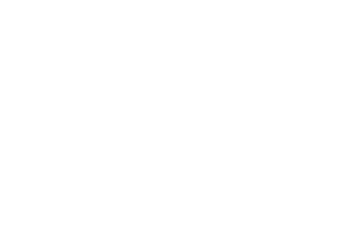

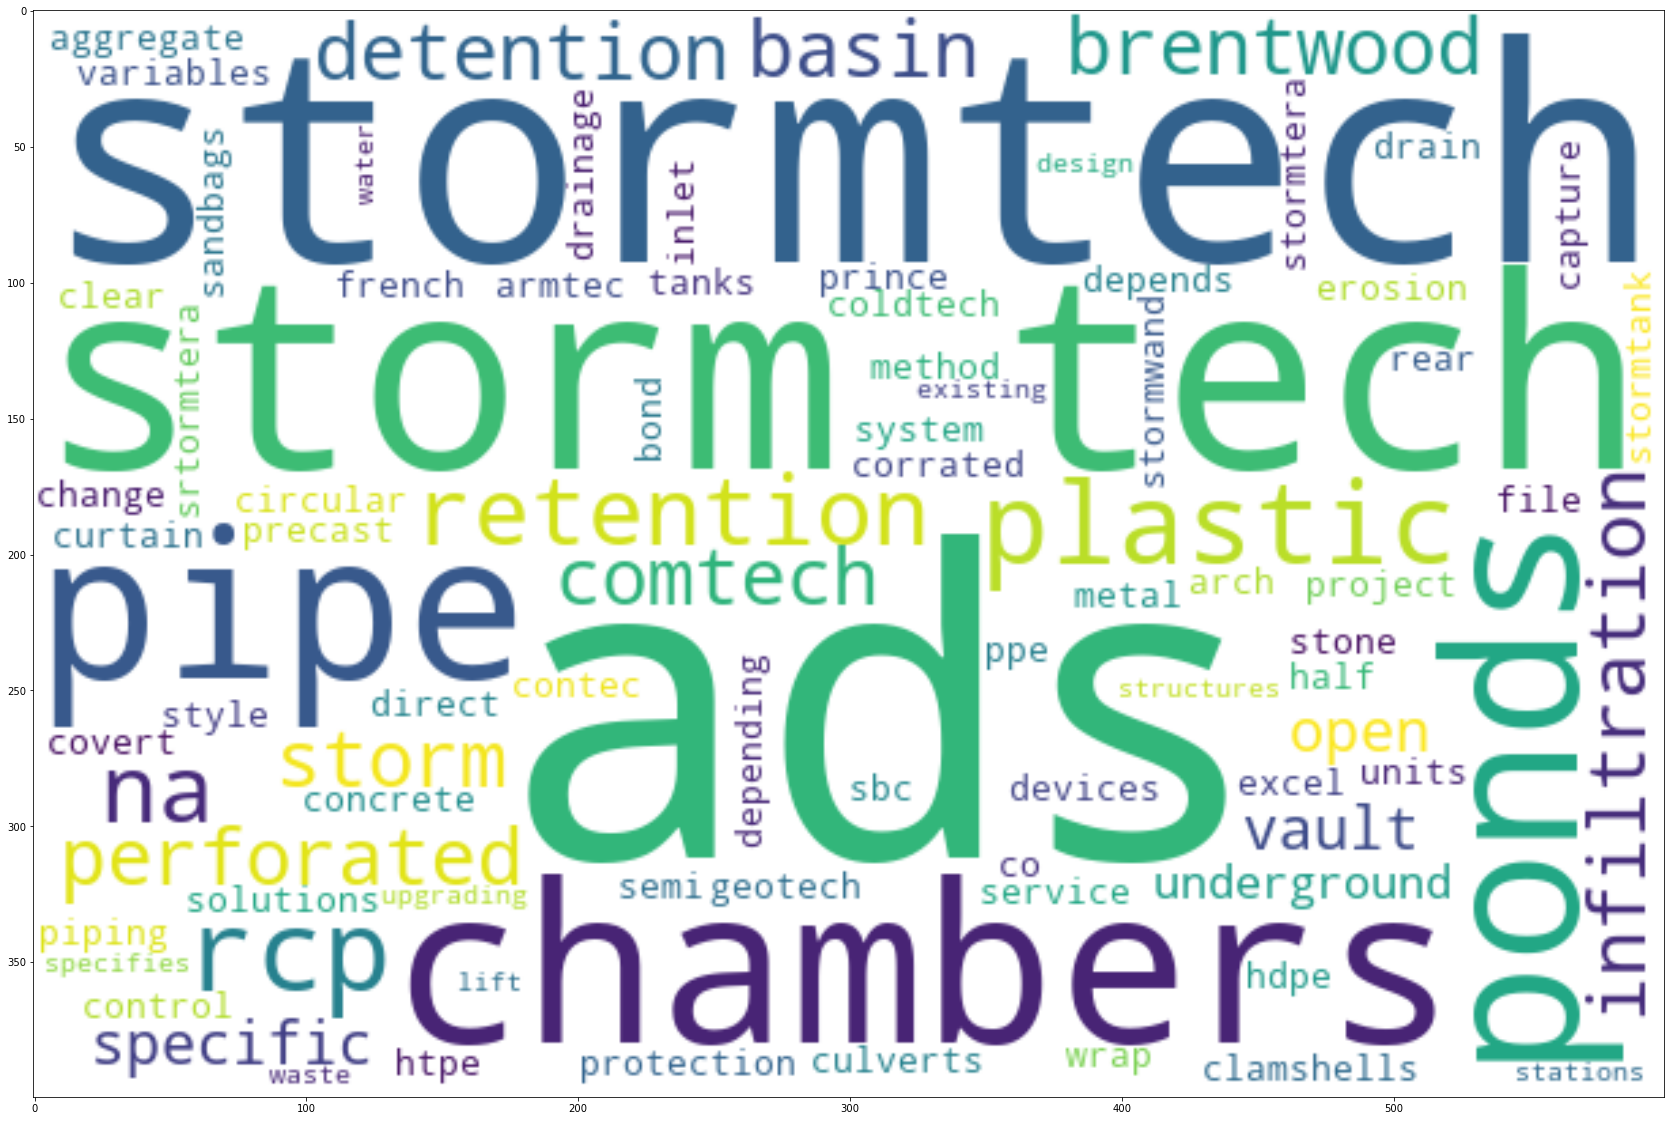

In [40]:
# Python program to generate WordCloud for column 3-First

# Text of all words in column bloom

text = " ".join(review for review in df_new['3-First'])
print ("There are {} words in the combination of all cells in column 3-First.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=600, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [18]:
#add values from 3-First into Pareto_3First based on defined conditions
condition_1 = ['ads', 'stormtech', 'storm tech']
condition_2 = ['basin method', 'open basin']
condition_3 = ['ponds', 'open file retention bond', 'pipes to ponds', 'retention ponds', 'retention - covert']
condition_4 = ['clamshells and semi circular pipes with aggregate', 'coldtech half  pipe', 'french drain',
               'hdpe', 'htpe', 'ppe', 'rcp', 'rcp contec', 'rear curtain drainage']
condition_5 = ['brentwood storm chambers', 'brentwood', 'chambers by armtec', 
               'chambers with - clear stone and a geotech style wrap', 'underground chambers', 'underground detention',]
condition_6 =['detention tanks', 'underground detention', 'precast concrete vault', ' vaults']
condition_7= ['we do as the design specifies', 'upgrading existing structures', 'comtech', 'stormwand', 'infiltration devices',
              'direct infiltrations', ' waste water lift stations', 'sandbags and plastic', 'culverts']

#make condition for what is not counted and print that out 

In [19]:
#Creating the Pareto table
#Bucketing for ads
def checkWords(word: str):
    for ch in condition_1:
        if ch in word:
            return 1
    return 0
Pareto_3First['ADS']=df_new['3-First'].apply(checkWords)

#bucketing for basins
def checkWords(word: str):
    for ch in condition_2:
        if ch in word:
            return 1
    return 0
Pareto_3First['Basins']=df_new['3-First'].apply(checkWords)

#bucketing for Ponds
def checkWords(word: str):
    for ch in condition_3:
        if ch in word:
            return 1
    return 0
Pareto_3First['Ponds']=df_new['3-First'].apply(checkWords)

#bucketing for Pipes
def checkWords(word: str):
    for ch in condition_4:
        if ch in word:
            return 1
    return 0
Pareto_3First['Pipes']=df_new['3-First'].apply(checkWords)

#bucketing for Chambers
def checkWords(word: str):
    for ch in condition_5:
        if ch in word:
            return 1
    return 0
Pareto_3First['Chambers']=df_new['3-First'].apply(checkWords)

#bucketing for Storage Vaults or Tanks
def checkWords(word: str):
    for ch in condition_6:
        if ch in word:
            return 1
    return 0
Pareto_3First['Storage Vaults or Tanks']=df_new['3-First'].apply(checkWords)

#bucketing for others
def checkWords(word: str):
    for ch in condition_6:
        if ch in word:
            return 1
    return 0
Pareto_3First['Others']=df_new['3-First'].apply(checkWords)


print(Pareto_3First)
Pareto_3First.sum().sort_values(ascending = False)

    ADS  Basins  Ponds  Pipes  Chambers  Storage Vaults or Tanks  Others
0     1       0      0      0         0                        0       0
1     1       0      0      0         0                        0       0
2     1       0      0      0         0                        0       0
3     1       0      0      0         0                        0       0
4     1       0      0      0         0                        0       0
5     1       0      0      0         0                        0       0
6     1       0      0      0         0                        0       0
7     1       0      0      0         0                        0       0
8     1       0      0      0         0                        0       0
9     1       0      0      0         0                        0       0
10    1       0      0      0         0                        0       0
11    1       0      0      0         0                        0       0
12    1       0      0      0         0            

ADS                        37
Pipes                      11
Ponds                       7
Chambers                    6
Others                      3
Storage Vaults or Tanks     3
Basins                      2
dtype: int64

In [20]:
#Now do I wanna create a new excel for this? maybe if its needed. 


In [21]:
#Now we can make a pareto chart
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

<AxesSubplot:>

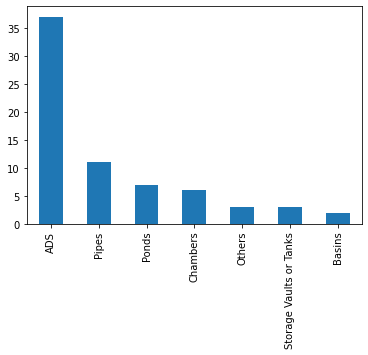

In [22]:
x = Pareto_3First.sum().sort_values(ascending = False)
y = x.cumsum()/x.sum()*100
x.plot.bar()
#x["cumpercentage"] = df["country"].cumsum()/df["country"].sum()*100

<ipython-input-23-0f8b6192d8f5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(column_names, rotation = 90)


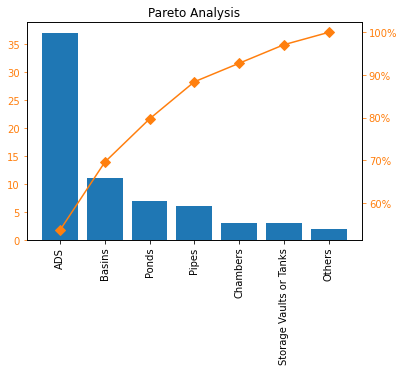

In [23]:
fig, ax = plt.subplots()
ax.bar(column_names, x, color="C0")
ax2 = ax.twinx()
ax2.plot(column_names, y, color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title("Pareto Analysis")
ax.tick_params(axis="y", colors="C1")
ax2.tick_params(axis="y", colors="C1")
#plt.xlabel('xLabel', fontsize=5)
ax.set_xticklabels(column_names, rotation = 90)
plt.show()

In [24]:
#Remove all stop words from dataframe. Import NLP library. 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize